# Récupération des données
L'objectif de ce notebook est d'expliquer comment accéder aux données utilisées dans ce projet.

In [10]:
import os
import s3fs
import pandas as pd
import requests
import matplotlib.pyplot as plt


## Demandes de Valeurs Foncières Géolocalisées

Il s'agit d'un grand jeu de données (plus de 3 Go), nous avons donc dû le stocker dans le SSPCloud.
Pour récupérer ces données, vous pouvez simplement utiliser le code suivant dans votre environnement SSPCloud ou télécharger les données en utilisant ce [lien](https://www.data.gouv.fr/datasets/demandes-de-valeurs-foncieres-geolocalisees) et en téléchargeant le fichier « dvf.csv.gz ».

In [3]:
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]

fs = s3fs.S3FileSystem(
    anon=True,
    client_kwargs={"endpoint_url": S3_ENDPOINT_URL}
)

with fs.open("renan/diffusion/dvf.csv", mode="rb") as f:
    df_dvf=pd.read_csv(f)

/tmp/ipykernel_4297/2831312233.py:9: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dvf=pd.read_csv(f)


In [ ]:
df_dvf.columns

id_mutation                             object
date_mutation                   datetime64[ns]
numero_disposition                       int64
nature_mutation                         object
valeur_fonciere                        float64
adresse_numero                         float64
adresse_suffixe                         object
adresse_nom_voie                        object
adresse_code_voie                       object
code_postal                            float64
code_commune                            object
nom_commune                             object
code_departement                        object
ancien_code_commune                    float64
ancien_nom_commune                      object
id_parcelle                             object
ancien_id_parcelle                      object
numero_volume                           object
lot1_numero                             object
lot1_surface_carrez                    float64
lot2_numero                             object
lot2_surface_

## Pharmacies
Ce jeu de données est également stocké dans le SSPCloud, il peut donc être accédé de manière similaire. Nous pouvons également utiliser le [lien](https://www.data.gouv.fr/datasets/localisation-des-pharmacies-dans-openstreetmap/?utm_source=chatgpt.com) pour le télécharger.


In [5]:
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]

fs = s3fs.S3FileSystem(
    anon=True,
    client_kwargs={"endpoint_url": S3_ENDPOINT_URL}
)

with fs.open("renan/diffusion/pharmacies_point.csv", mode="rb") as f:
    df_pharm=pd.read_csv(f)

/tmp/ipykernel_4297/808618708.py:9: DtypeWarning: Columns (4,11,16,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pharm=pd.read_csv(f)


In [6]:
df_pharm

,FID,osm_id,amenity,name,short_name,official_name,alt_name,old_name,operator,operator-type,...,wikipedia,description,opening_hours,source,note,osm_version,osm_timestamp,the_geom,osm_original_geom,osm_type
0,pharmacies_point.4534591198,4534591198,pharmacy,Pharmacie Centrale de Bondy,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mo-Sa 08:30-19:30,Le ministère des solidarités et de la santé - ...,NaN,7,2024-05-11T16:57:42Z,POINT (276175.8531618072 6260215.629555009),NaN,node
1,pharmacies_point.3770631311,3770631311,pharmacy,Pharmacie Lafayette Michel,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Mo 14:00-19:00; Tu-Fr 09:00-12:00,14:00-19:00;...",Celtipharm - 10/2014,NaN,7,2025-10-04T07:58:44Z,POINT (773623.818146609 6154607.854076906),NaN,node
2,pharmacies_point.172156934,172156934,pharmacy,Pharmacie des Andaines,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,cadastre-dgi-fr source : Direction Générale de...,NaN,11,2023-08-18T08:56:31Z,POINT (-40562.0055358363 6204977.067562205),SRID=3857;POLYGON((-40572.837448406004 6204977...,way
3,pharmacies_point.3918927589,3918927589,pharmacy,Pharmacie Cayeux Etaploise,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"Mo-Fr 08:30-12:30,14:00-19:30; Sa 08:30-12:30,...",Celtipharm - 10/2014,NaN,6,2025-10-09T20:46:23Z,POINT (182438.6302862845 6535708.511748197),NaN,node
4,pharmacies_point.2749148434,2749148434,pharmacy,Pharmacie de la Passerelle,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mo-Fr 08:30-19:30; Sa 09:00-12:30,Celtipharm - 10/2014,NaN,8,2024-08-09T08:19:51Z,POINT (537447.0172498629 5741414.914610561),NaN,node
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19122,pharmacies_point.1008156074,1008156074,pharmacy,Pharmacie Breuzin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,https://www.centrecommercial-chambray2.fr/,NaN,4,2025-08-16T15:13:26Z,POINT (77715.451590388 5997556.758351026),SRID=3857;POLYGON((77694.39219595183 5997558.0...,way
19123,pharmacies_point.3712079795,3712079795,pharmacy,Pharmacie des Arènes,NaN,NaN,NaN,Pharmacie de Queuleu,NaN,NaN,...,NaN,NaN,"Mo-Fr 08:15-12:30,13:30-19:30; Sa 08:15-12:30,...",survey,NaN,7,2025-08-18T15:41:48Z,POINT (688772.8183389974 6293797.444067404),NaN,node
19124,pharmacies_point.1933342224,1933342224,pharmacy,Pharmacie Jacques,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Celtipharm - 10/2014,NaN,6,2023-06-28T20:45:08Z,POINT (693133.6703352312 6143713.310348924),NaN,node
19125,pharmacies_point.3485646116,3485646116,pharmacy,Pharmacie Patrick Touboul,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Mo-Fr 09:00-19:30,NaN,NaN,9,2022-05-17T18:55:10Z,POINT (278234.4511091999 6222776.176893683),NaN,node


## API CATNAT
Le code suivant montre comment nous pouvons récupérer des données sur les catastrophes naturelles en utilisant l'API disponible sur le site [Géorisques](https://www.georisques.gouv.fr/doc-api#/CATNAT/rechercheCatNat). L'exemple suivant montre les catastrophes naturelles qui se sont produites à Paris au cours des années.

In [44]:
import requests
import pandas as pd
from time import sleep

# -------------------------------
# 1. Identifier les 10 communes les plus actives
# -------------------------------
top10_communes = ventes_par_commune.sort_values('nombre_ventes', ascending=False).head(10)
top10_codes = top10_communes['code_commune'].tolist()

# -------------------------------
# 2. Liste pour stocker les DataFrames
# -------------------------------
dfs_catnat_top10 = []

# -------------------------------
# 3. Boucle sur les 10 codes
# -------------------------------
for code in top10_codes:
    page = 1
    while True:
        params = {
            "code_insee": code,
            "page": page,
            "page_size": 1000
        }

        try:
            resp = requests.get("https://www.georisques.gouv.fr/api/v1/gaspar/catnat", params=params)
            resp.raise_for_status()
        except requests.RequestException as e:
            print(f"Erreur pour le code {code} à la page {page}: {e}")
            break

        data = resp.json()
        if isinstance(data, dict) and "data" in data and data["data"]:
            df_page = pd.DataFrame(data["data"])
            dfs_catnat_top10.append(df_page)

            # Vérifier si c'est la dernière page
            if len(data["data"]) < 1000:
                break
            else:
                page += 1
        else:
            break

        sleep(0.2)  # pause pour ne pas surcharger l'API

# -------------------------------
# 4. Concaténer tous les résultats
# -------------------------------
df_catnat_top10 = pd.concat(dfs_catnat_top10, ignore_index=True)

print(df_catnat_top10.shape)
df_catnat_top10

(439, 8)


,code_national_catnat,date_debut_evt,date_fin_evt,date_publication_arrete,date_publication_jo,libelle_risque_jo,code_insee,libelle_commune
0,INTE0000364A,10/06/2000,10/06/2000,21/07/2000,01/08/2000,Inondations et/ou Coulées de Boue,31555,TOULOUSE
1,INTE0000771A,01/01/1998,31/12/1998,27/12/2000,29/12/2000,Sécheresse,31555,TOULOUSE
2,INTE0000771A,01/01/1998,31/12/1998,27/12/2000,29/12/2000,Sécheresse,31555,TOULOUSE
3,INTE0000771A,01/01/1998,31/12/1998,27/12/2000,29/12/2000,Sécheresse,31555,TOULOUSE
4,INTE0000771A,01/01/1998,31/12/1998,27/12/2000,29/12/2000,Sécheresse,31555,TOULOUSE
...,...,...,...,...,...,...,...,...
434,NOR19831115,23/08/1983,24/08/1983,15/11/1983,18/11/1983,Inondations et/ou Coulées de Boue,83137,TOULON
435,NOR19831115,28/08/1983,29/08/1983,15/11/1983,18/11/1983,Mouvement de Terrain,83137,TOULON
436,NOR19831115,28/08/1983,29/08/1983,15/11/1983,18/11/1983,Mouvement de Terrain,83137,TOULON
437,NOR19831115,28/08/1983,29/08/1983,15/11/1983,18/11/1983,Inondations et/ou Coulées de Boue,83137,TOULON


## Initial Analysis


In [9]:
print(df_dvf.columns)
print(df_catnat.columns)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')
Index(['code_national_catnat', 'date_debut_evt', 'date_fin_evt',
       'date_publication_arrete', 'date_publication_jo', 'l

In [27]:
ventes_par_commune = df_dvf.groupby(
    ['code_commune', 'nom_commune']
).size().reset_index(name='nombre_ventes')

print(ventes_par_commune)

      code_commune              nom_commune  nombre_ventes
0            01001  L'Abergement-Clémenciat            206
1            01002    L'Abergement-de-Varey            161
2            01004        Ambérieu-en-Bugey           4510
3            01005      Ambérieux-en-Dombes            654
4            01006                  Ambléon            127
...            ...                      ...            ...
33375        97420           Sainte-Suzanne           2419
33376        97421                  Salazie            586
33377        97422                Le Tampon           8490
33378        97423        Les Trois-Bassins            971
33379        97424                   Cilaos            558

[33380 rows x 3 columns]


In [ ]:
import pandas as pd


# 1. Conversion de la colonne date_mutation en datetime

df_dvf['date_mutation'] = pd.to_datetime(df_dvf['date_mutation'], errors='coerce')


# 2. Standardisation des codes communes
# On s'assure que chaque code_commune est une chaîne de 5 caractères

df_dvf['code_commune'] = df_dvf['code_commune'].astype(str).str.zfill(5)


# 3. Suppression des mutations avec codes incohérents
# On identifie les id_mutation associés à plusieurs codes communes

problematic_ids = df_dvf.groupby('id_mutation')['code_commune'].nunique()
problematic_ids = problematic_ids[problematic_ids > 1].index

df_clean = df_dvf[~df_dvf['id_mutation'].isin(problematic_ids)].copy()


# 4. Comptage des ventes par commune

ventes_par_commune = df_clean.groupby(
    ['code_commune', 'nom_commune']
)['id_mutation'].nunique().reset_index(name='nombre_ventes')


# 5. Création d'une colonne semestre
# Format : "année-S1" pour janvier à juin, "année-S2" pour juillet à décembre

df_clean['annee_semestre'] = (
    df_clean['date_mutation'].dt.year.astype(str)
    + '-S' + df_clean['date_mutation'].dt.month.apply(lambda x: '1' if x <= 6 else '2')
)


# 6. Comptage des ventes par semestre et par commune

ventes_par_semestre_commune = df_clean.groupby(
    ['annee_semestre', 'code_commune', 'nom_commune']
)['id_mutation'].nunique().reset_index(name='nombre_ventes')




Exemple de ventes par commune :
  code_commune              nom_commune  nombre_ventes
0        01001  L'Abergement-Clémenciat             71
1        01002    L'Abergement-de-Varey             41
2        01004        Ambérieu-en-Bugey           1617
3        01005      Ambérieux-en-Dombes            259
4        01006                  Ambléon             30

Exemple de ventes par semestre et commune :
  annee_semestre code_commune              nom_commune  nombre_ventes
0        2020-S2        01001  L'Abergement-Clémenciat              9
1        2020-S2        01002    L'Abergement-de-Varey              3
2        2020-S2        01004        Ambérieu-en-Bugey            185
3        2020-S2        01005      Ambérieux-en-Dombes             33
4        2020-S2        01006                  Ambléon              4


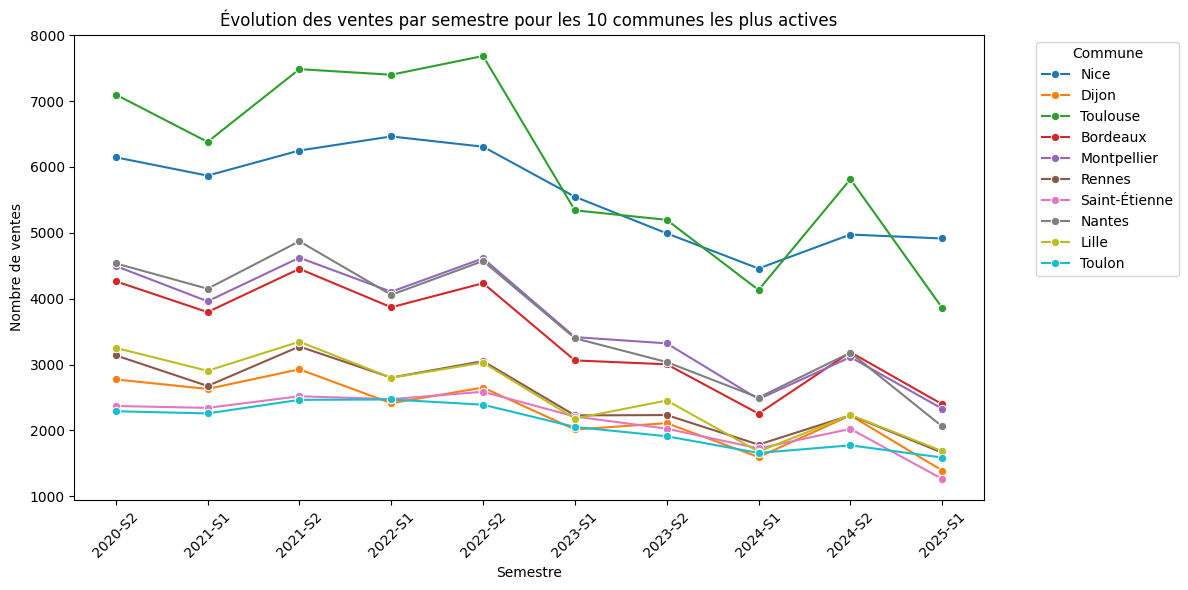

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Identifier les 10 communes avec le plus de ventes totales
# -------------------------------
top10_communes = ventes_par_commune.sort_values('nombre_ventes', ascending=False).head(10)
top10_codes = top10_communes['code_commune'].tolist()

# -------------------------------
# 2. Filtrer le DataFrame pour ces 10 communes
# -------------------------------
df_top10 = ventes_par_semestre_commune[
    ventes_par_semestre_commune['code_commune'].isin(top10_codes)
].copy()

# -------------------------------
# 3. Tracer l'évolution des ventes par semestre
# -------------------------------
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_top10,
    x='annee_semestre',
    y='nombre_ventes',
    hue='nom_commune',
    marker='o'
)

plt.xticks(rotation=45)
plt.title("Évolution des ventes par semestre pour les 10 communes les plus actives")
plt.xlabel("Semestre")
plt.ylabel("Nombre de ventes")
plt.legend(title="Commune", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Convertir les colonnes de dates en datetime
df_catnat_top10['date_debut_evt'] = pd.to_datetime(df_catnat_top10['date_debut_evt'], errors='coerce')
df_catnat_top10['date_fin_evt'] = pd.to_datetime(df_catnat_top10['date_fin_evt'], errors='coerce')
df_catnat_top10['date_publication_arrete'] = pd.to_datetime(df_catnat_top10['date_publication_arrete'], errors='coerce')
df_catnat_top10['date_publication_jo'] = pd.to_datetime(df_catnat_top10['date_publication_jo'], errors='coerce')

# Filtrer pour ne garder que les catastrophes à partir de 2020
df_catnat_top10 = df_catnat_top10[df_catnat_top10['date_debut_evt'] >= '2020-01-01'].copy()

# Standardiser les codes INSEE
df_catnat_top10['code_insee'] = df_catnat_top10['code_insee'].astype(str).str.zfill(5)

# Vérifier le résultat
print(f"Nombre de catastrophes à partir de 2020: {len(df_catnat_top10)}")
print(f"\nPlage de dates: {df_catnat_top10['date_debut_evt'].min()} à {df_catnat_top10['date_debut_evt'].max()}")
print(f"\nNombre de catastrophes par commune:")
print(df_catnat_top10.groupby('libelle_commune').size().sort_values(ascending=False))


Nombre de catastrophes à partir de 2020: 49

Plage de dates: 2020-01-01 00:00:00 à 2025-09-20 00:00:00

Nombre de catastrophes par commune:
libelle_commune
NICE             11
NANTES            6
TOULON            5
DIJON             5
MONTPELLIER       5
SAINT-ETIENNE     5
BORDEAUX          4
TOULOUSE          4
RENNES            3
LILLE             1
dtype: int64


,code_national_catnat,date_debut_evt,date_fin_evt,date_publication_arrete,date_publication_jo,libelle_risque_jo,code_insee,libelle_commune,annee_semestre
32,INTE2122515A,2020-07-01,2020-09-30,2021-07-27,2021-08-31,Sécheresse,31555,TOULOUSE,2020-S2
33,INTE2202054A,2022-01-09,2022-01-12,2022-01-24,2022-02-12,Inondations et/ou Coulées de Boue,31555,TOULOUSE,2022-S1
67,IOME2318045A,2022-07-01,2022-12-31,2023-07-23,2023-09-26,Sécheresse,31555,TOULOUSE,2022-S2
68,IOME2324728A,2023-06-11,2023-06-11,2023-09-18,2023-10-20,Inondations et/ou Coulées de Boue,31555,TOULOUSE,2023-S1
139,INTE2026671A,2020-10-02,2020-10-03,2020-10-07,2020-10-08,Inondations et/ou Coulées de Boue,06088,NICE,2020-S2
140,INTE2026671A,2020-10-02,2020-10-03,2020-10-07,2020-10-08,Chocs Mécaniques liés à l'action des Vagues,06088,NICE,2020-S2
143,INTE2428510A,2024-10-15,2024-10-19,2024-10-30,2024-11-04,Inondations et/ou Coulées de Boue,06088,NICE,2024-S2
144,INTE2430293A,2024-03-01,2024-03-02,2024-11-17,2024-12-02,Mouvement de Terrain,06088,NICE,2024-S1
145,INTE2430293A,2024-03-01,2024-03-02,2024-11-17,2024-12-02,Mouvement de Terrain,06088,NICE,2024-S1
146,INTE2430293A,2024-02-25,2024-02-25,2024-11-17,2024-12-02,Mouvement de Terrain,06088,NICE,2024-S1


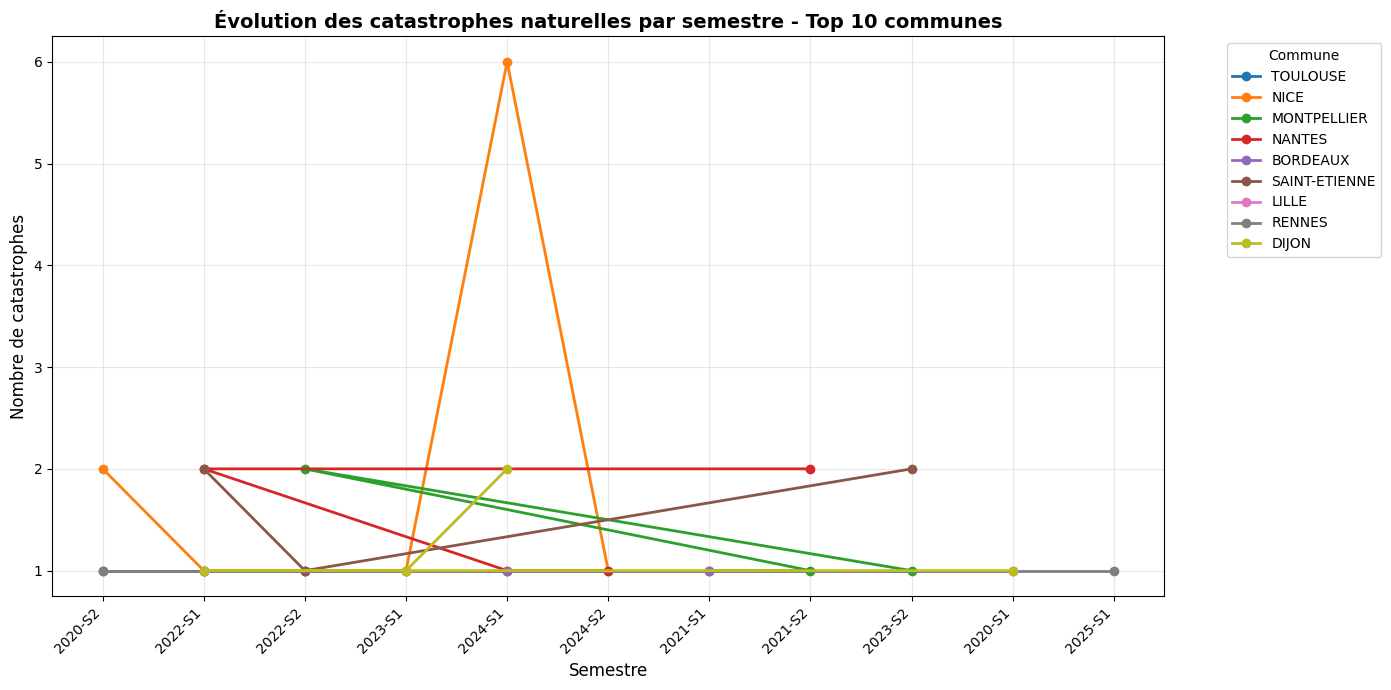


=== Statistiques des catastrophes par commune (2020+) ===
TOULOUSE: Total = 4, Moyenne par semestre = 1.0
NICE: Total = 11, Moyenne par semestre = 2.2
MONTPELLIER: Total = 5, Moyenne par semestre = 1.2
NANTES: Total = 6, Moyenne par semestre = 1.5
BORDEAUX: Total = 4, Moyenne par semestre = 1.0
SAINT-ETIENNE: Total = 5, Moyenne par semestre = 1.7
LILLE: Total = 1, Moyenne par semestre = 1.0
RENNES: Total = 3, Moyenne par semestre = 1.0
DIJON: Total = 5, Moyenne par semestre = 1.2
Besançon: Aucune catastrophe enregistrée depuis 2020


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une colonne annee_semestre pour les catastrophes
df_catnat_top10['annee_semestre'] = (
    df_catnat_top10['date_debut_evt'].dt.year.astype(str)
    + '-S' + df_catnat_top10['date_debut_evt'].dt.month.apply(lambda x: '1' if x <= 6 else '2')
)

# Compter le nombre de catastrophes par semestre et par commune
catnat_par_semestre_commune = df_catnat_top10.groupby(
    ['annee_semestre', 'code_insee', 'libelle_commune']
).size().reset_index(name='nombre_catastrophes')

# Standardiser le code_insee
catnat_par_semestre_commune['code_insee'] = catnat_par_semestre_commune['code_insee'].astype(str).str.zfill(5)

# Créer le graphique
plt.figure(figsize=(14, 7))

for code in top10_codes:
    data_commune = catnat_par_semestre_commune[catnat_par_semestre_commune['code_insee'] == code]
    
    if len(data_commune) > 0:
        nom = data_commune['libelle_commune'].iloc[0]
        
        plt.plot(data_commune['annee_semestre'], 
                 data_commune['nombre_catastrophes'],
                 marker='o', 
                 label=nom,
                 linewidth=2,
                 markersize=6)

plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Nombre de catastrophes', fontsize=12)
plt.title('Évolution des catastrophes naturelles par semestre - Top 10 communes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commune', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher quelques statistiques
print("\n=== Statistiques des catastrophes par commune (2020+) ===")
for code in top10_codes:
    data_commune = catnat_par_semestre_commune[catnat_par_semestre_commune['code_insee'] == code]
    
    if len(data_commune) > 0:
        nom = data_commune['libelle_commune'].iloc[0]
        total = data_commune['nombre_catastrophes'].sum()
        moyenne = data_commune['nombre_catastrophes'].mean()
        print(f"{nom}: Total = {total}, Moyenne par semestre = {moyenne:.1f}")
    else:
        # Trouver le nom de la commune dans df_top10
        nom_commune = ventes_par_semestre_commune[
            ventes_par_semestre_commune['code_commune'] == code
        ]['nom_commune'].iloc[0]
        print(f"{nom_commune}: Aucune catastrophe enregistrée depuis 2020")

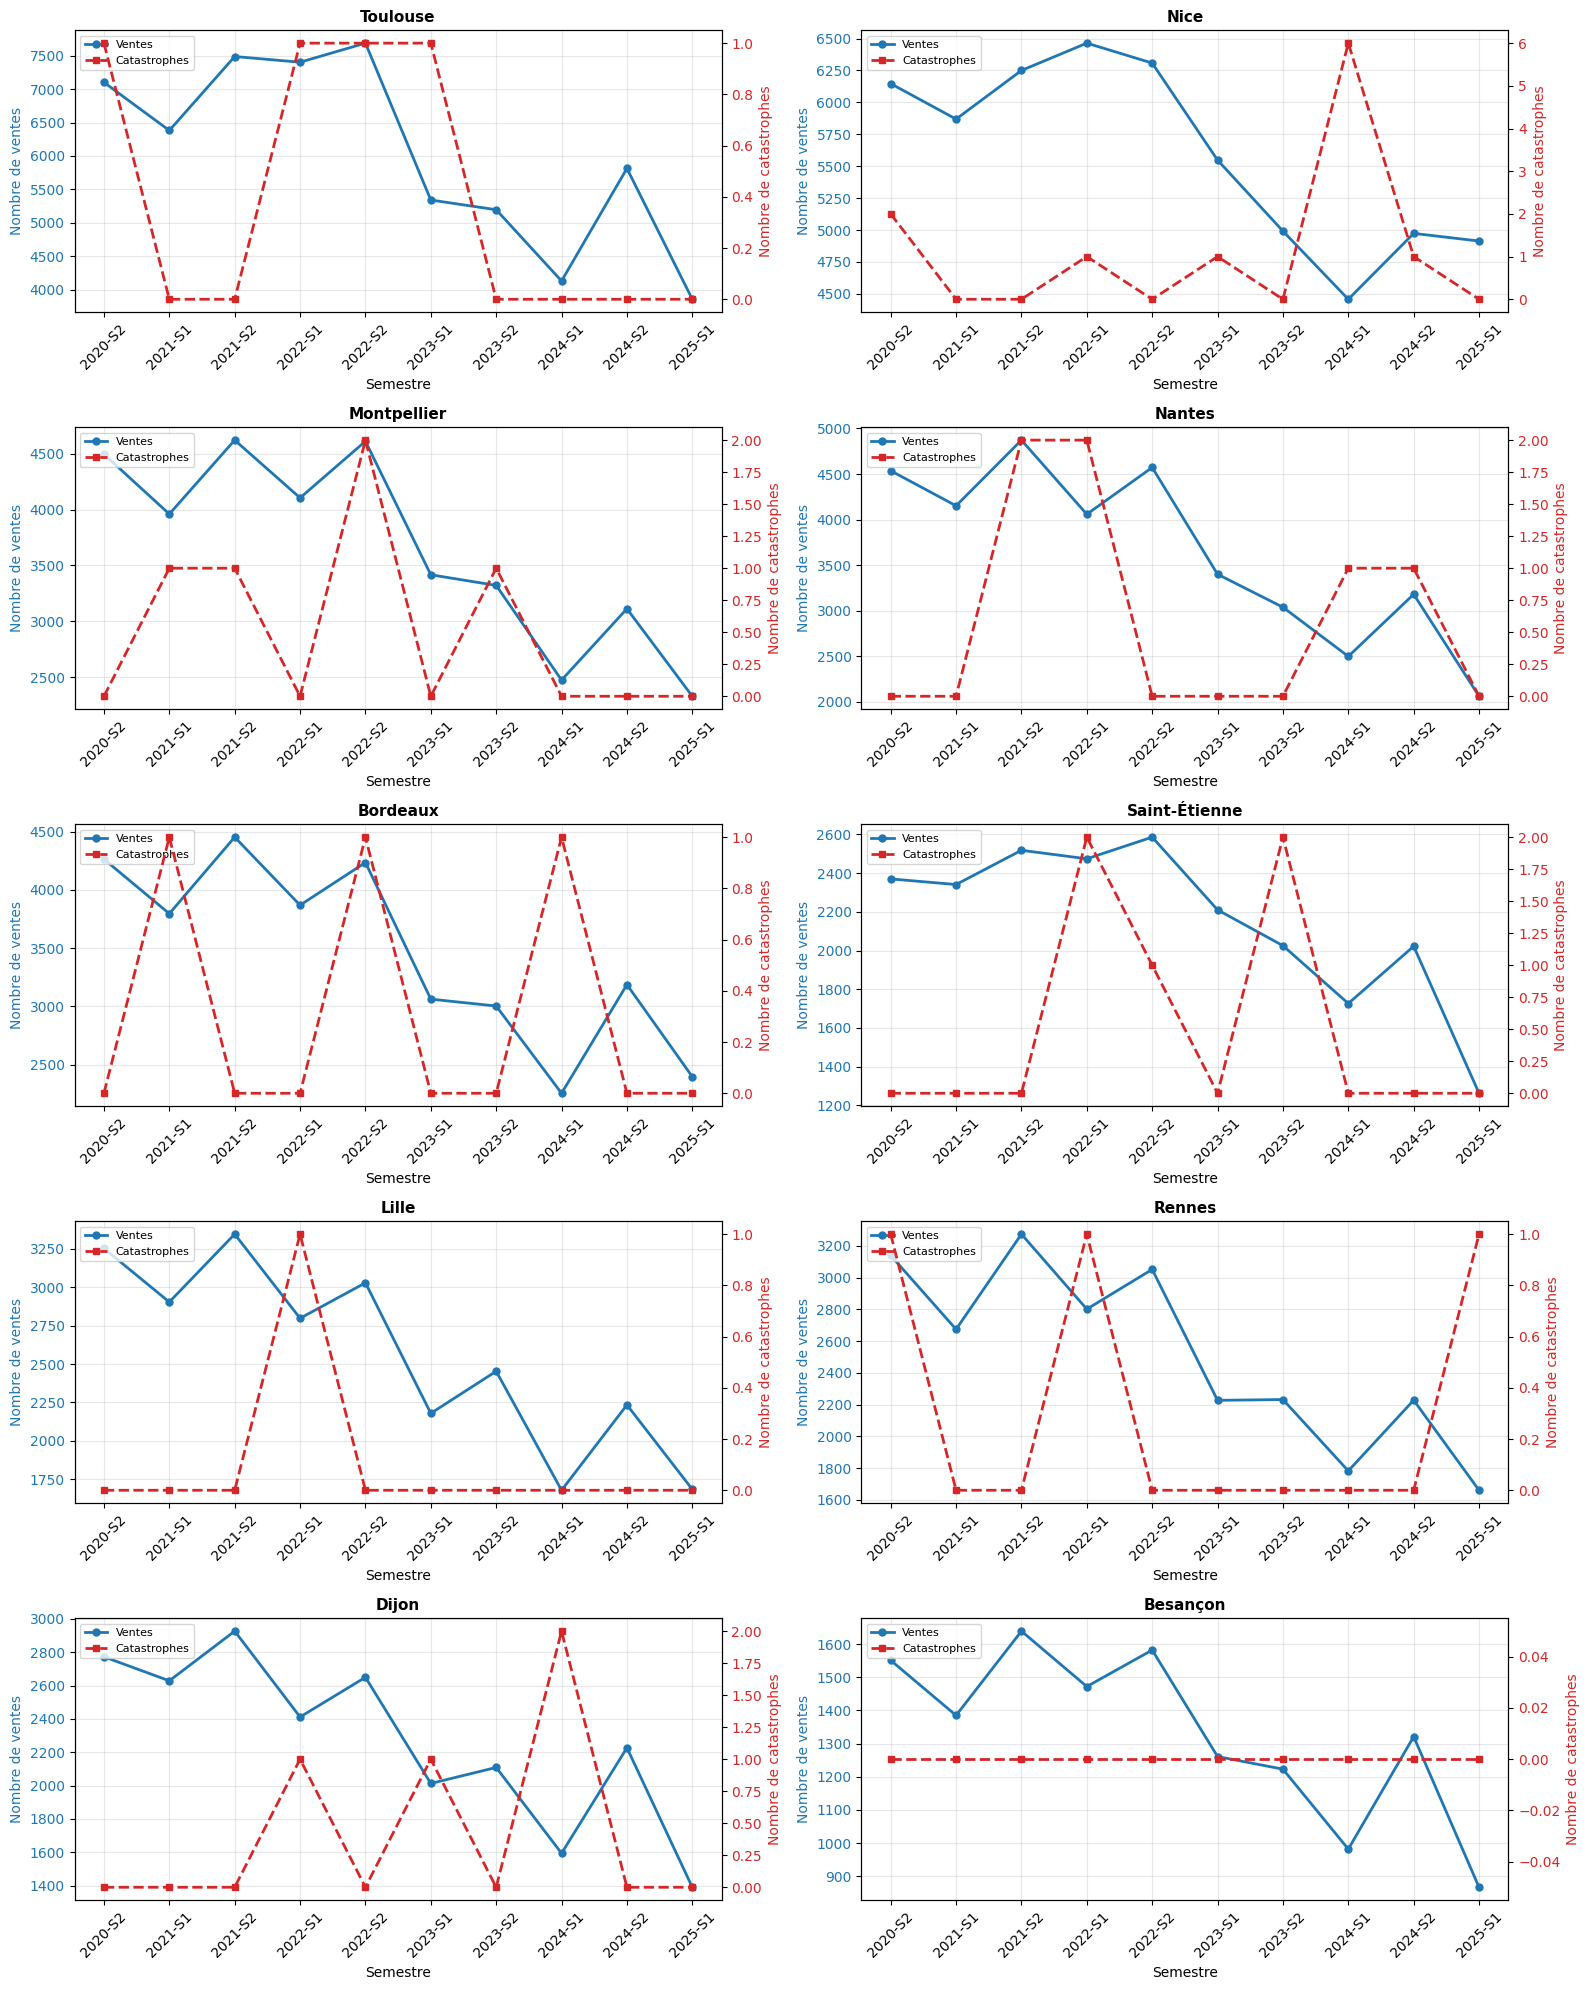


=== Tableau récapitulatif ===
Commune                        Total ventes    Total catastrophes   Corrélation 
--------------------------------------------------------------------------------
Toulouse                       60398           4                    0.519       
Nice                           55924           11                   -0.461      
Montpellier                    36445           5                    0.538       
Nantes                         36360           6                    0.239       
Bordeaux                       34519           3                    -0.021      
Saint-Étienne                  21534           5                    0.260       
Lille                          25558           1                    0.141       
Rennes                         25069           3                    0.033       
Dijon                          22724           4                    -0.464      
Besançon                       13283           0                    N/A       

In [ ]:
import matplotlib.pyplot as plt

# Préparer les données
# Fusionner ventes et catastrophes par semestre et commune
df_analyse = ventes_par_semestre_commune[
    ventes_par_semestre_commune['code_commune'].isin(top10_codes)
].copy()

df_analyse = df_analyse.merge(
    catnat_par_semestre_commune,
    left_on=['annee_semestre', 'code_commune'],
    right_on=['annee_semestre', 'code_insee'],
    how='left'
)

# Remplacer les NaN par 0 (semestres sans catastrophe)
df_analyse['nombre_catastrophes'] = df_analyse['nombre_catastrophes'].fillna(0)

# Créer 10 graphiques (2 lignes x 5 colonnes)
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, code in enumerate(top10_codes):
    data_commune = df_analyse[df_analyse['code_commune'] == code].sort_values('annee_semestre')
    nom = data_commune['nom_commune'].iloc[0]
    
    ax1 = axes[idx]
    
    # Premier axe Y : nombre de ventes (en bleu)
    color1 = 'tab:blue'
    ax1.set_xlabel('Semestre', fontsize=10)
    ax1.set_ylabel('Nombre de ventes', color=color1, fontsize=10)
    line1 = ax1.plot(data_commune['annee_semestre'], 
                     data_commune['nombre_ventes'],
                     color=color1, 
                     marker='o', 
                     linewidth=2,
                     markersize=5,
                     label='Ventes')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.tick_params(axis='x', rotation=45)
    
    # Deuxième axe Y : nombre de catastrophes (en rouge)
    ax2 = ax1.twinx()
    color2 = 'tab:red'
    ax2.set_ylabel('Nombre de catastrophes', color=color2, fontsize=10)
    line2 = ax2.plot(data_commune['annee_semestre'], 
                     data_commune['nombre_catastrophes'],
                     color=color2, 
                     marker='s', 
                     linewidth=2,
                     markersize=5,
                     linestyle='--',
                     label='Catastrophes')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    # Titre
    ax1.set_title(f'{nom}', fontsize=11, fontweight='bold')
    
    # Grille
    ax1.grid(True, alpha=0.3)
    
    # Légende combinée
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

# Afficher un tableau récapitulatif
print("\n=== Tableau récapitulatif ===")
print(f"{'Commune':<30} {'Total ventes':<15} {'Total catastrophes':<20} {'Corrélation':<12}")
print("-" * 80)

for code in top10_codes:
    data_commune = df_analyse[df_analyse['code_commune'] == code]
    nom = data_commune['nom_commune'].iloc[0]
    total_ventes = data_commune['nombre_ventes'].sum()
    total_catnat = data_commune['nombre_catastrophes'].sum()
    
    # Calculer la corrélation si il y a des catastrophes
    if data_commune['nombre_catastrophes'].sum() > 0:
        corr = data_commune[['nombre_ventes', 'nombre_catastrophes']].corr().iloc[0, 1]
        print(f"{nom:<30} {total_ventes:<15} {total_catnat:<20.0f} {corr:<12.3f}")
    else:
        print(f"{nom:<30} {total_ventes:<15} {total_catnat:<20.0f} {'N/A':<12}")
        # Pertinent ?